In [1]:
import os.path, json
from PIL import Image
import numpy as np
from IPython.display import display, Markdown, Latex, clear_output

# Map Creation

In [2]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

## Open map file (PNG format)

Enter path to map file (.PNG): test2.png


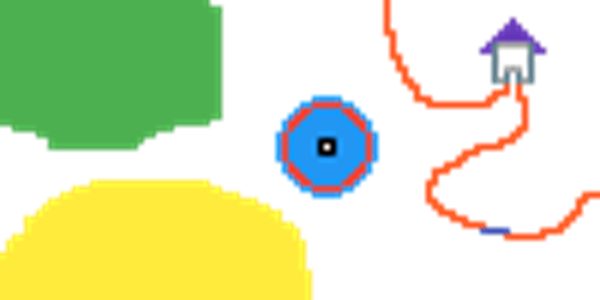

In [3]:
# filepath = "./test2.png" 
filepath = input("Enter path to map file (.PNG): ")

#----------------------------------------------#
img_RGB = Image.open(filepath).convert("RGBA")
img_np = np.array(img_RGB)
img_shape = img_np.shape

img_size, img_map_raw = img_RGB.size, img_np.reshape(img_shape[0]*img_shape[1], img_shape[2])
#----------------------------------------------#

img_RGB.resize(tuple(6 * i for i in img_size))

## Creating bitmap

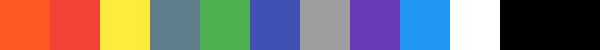

In [4]:
#----------------------------------------------#
col_dict = {tuple(elt[1]):i for (i, elt) in enumerate(img_RGB.getcolors())}
img_map = [col_dict[tuple(elt)] for elt in img_map_raw]

colors = [Image.fromarray(np.array(elt).reshape((1, 1, img_shape[2])).astype('uint8')).resize((50, 50)) for elt in col_dict.keys()]
#----------------------------------------------#

image_grid(colors, rows=1, cols=len(colors))

## Mapping color to unicode

In [5]:
#----------------------------------------------#
txts = ["#", "$", "^", "@", "~", "-", "_", "%", "o", "$", "+", " "]
#----------------------------------------------#

---

## Converting to unicode map

In [6]:
#----------------------------------------------#
txt_arr = np.reshape(np.array([txts[bit] for bit in img_map]), img_shape[0:2])
txt_map = "\n".join(["".join(elt) for elt in txt_arr.tolist()])
#----------------------------------------------#
print(txt_map)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                             #                                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                           #                                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                           #                                   
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                           #                    %              
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                           #                   %%%             
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                           ##                 %%%%%            
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                            #                %%%%%%%           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                            #               %@_____@%          
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                            #              %%@     @%%         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~                            ##               @     @  

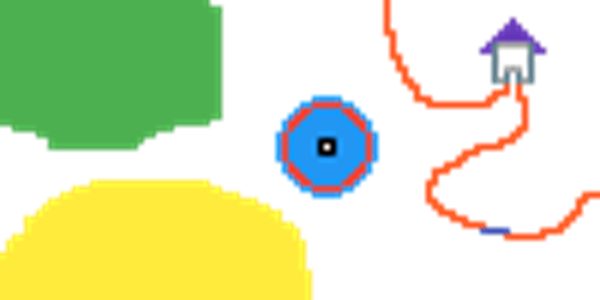

In [7]:
img_RGB.resize(tuple(6 * i for i in img_size))

# Surface creation

### Specify which surfaces are decorations

(No interactions, purely aesthetic)

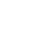

Is it a decoration? (y/n): n


In [8]:
decor_mask = np.empty(len(colors),  dtype=bool)

for ind, col in enumerate(colors):
    
    display(col)
    decor_mask[ind] = True if input("Is it a decoration? (y/n): ") == "y" else False
    clear_output(wait=True)

### If these are the desired decoration surfaces, proceed. Else, re-run previous cell.

In [9]:
decor_colors = [color for (color, mask) in zip(colors, decor_mask) if mask]
surf_colors = [color for (color, mask) in zip(colors, decor_mask) if not mask]

### Decoration tiles

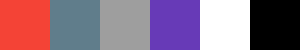

In [10]:
display(Markdown("### Decoration tiles"))
image_grid(decor_colors, rows=1, cols=len(decor_colors))

### Surface tiles

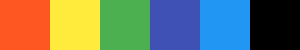

In [11]:
display(Markdown("### Surface tiles"))
image_grid(surf_colors, rows=1, cols=len(surf_colors))

## Metadata collection
```"{surface name}, {isWalkable}"```

Input must be a string separated by a comma, with first part having the name, and second part either 0/1 based on walkability of surface.

For example,
- Grass, 1
- Wall, 0
- Water, 0

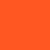

Meta-data: Fence, 0


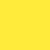

Meta-data: Sand, 1


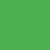

Meta-data: Grass, 1


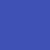

Meta-data: Bridge, 1


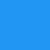

Meta-data: Water, 0


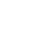

Meta-data: Space, 1


In [12]:
metadata = []

for col, surf in zip(surf_colors, txts):
    display(col)
    metadata.append(input("Meta-data: "))

In [13]:
names, walkables = zip(*[elt.split(",") for elt in metadata])
isWalkable = [bool(int(elt)) for elt in walkables]
chars = np.array(txts)[~decor_mask]

## Write to file

In [18]:
map_name = "Test"
map_path = "./maps/"
surface_path =  "./surfaces/"

#----------------------------------------------#
map_dict = {
    "name": map_name,
    "raw": txt_map,
    "init_pos": [],
    "exits": {},
    "items": {}
}

file_path = map_path + map_name.lower() + ".map"

print("Generating map file... \n----------")

if not (os.path.isdir(map_path)):  
    if(input("Folder does not exist. Do you want to create one? (y/n): ") == "y"):
        os.mkdir(map_path)
        print(f"\nMap folder \"{map_path}\" has been created.")
    else:
        raise Exception("Folder does not exist.")
    
if not(os.path.isfile(file_path)) or (os.path.isfile(file_path) and input(f"\nMap file for \"{map_name}\" already exists. Overwite? (y/n): ") == "y"):
    with open(file_path, "w", encoding ='utf8') as outfile:
        json_str = json.dumps(map_dict, indent = 4).replace("\\n", "\n")
        outfile.write(json_str)
    print(f"\nMap file \"{file_path}\" has been created.")
    
else:
    pass

print("----------\nGenerating surface files... \n----------")

for name, char, walk in zip(names, chars, isWalkable):
    surf_dict = {
        "name": name,
        "character": char,
        "walkable": walk
    }
    
    file_path = surface_path + name.lower() + ".surface"

    if not (os.path.isdir(surface_path)):  
        if(input("Folder does not exist. Do you want to create one? (y/n): ") == "y"):
            os.mkdir(surface_path)
            print(f"\nSurface folder \"{surface_path}\" has been created.")
        else:
            raise Exception("Folder does not exist.")

    if not(os.path.isfile(file_path)) or (os.path.isfile(file_path) and input(f"\nSurface file for \"{name}\" already exists. Overwite? (y/n): ") == "y"):
        with open(file_path, "w", encoding ='utf8') as outfile:
            json.dump(surf_dict, outfile, indent = 4)
        print(f"\nSurface file \"{file_path}\" has been created.")

    else:
        pass
    
#----------------------------------------------#

Generating map file... 
----------

Map file for "Test" already exists. Overwite? (y/n): y

Map file "./maps/test.map" has been created.
----------
Generating surface files... 
----------

Surface file for "Fence" already exists. Overwite? (y/n): n

Surface file for "Sand" already exists. Overwite? (y/n): n

Surface file for "Grass" already exists. Overwite? (y/n): n

Surface file for "Bridge" already exists. Overwite? (y/n): n

Surface file for "Water" already exists. Overwite? (y/n): n

Surface file for "Space" already exists. Overwite? (y/n): n
